In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/banknotes.csv')
df

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [3]:
x = df.drop('Class',axis =1)
y = df['Class']
print(x.shape)
print(y.shape)

(1372, 4)
(1372,)


In [4]:
y.value_counts()

0    762
1    610
Name: Class, dtype: int64

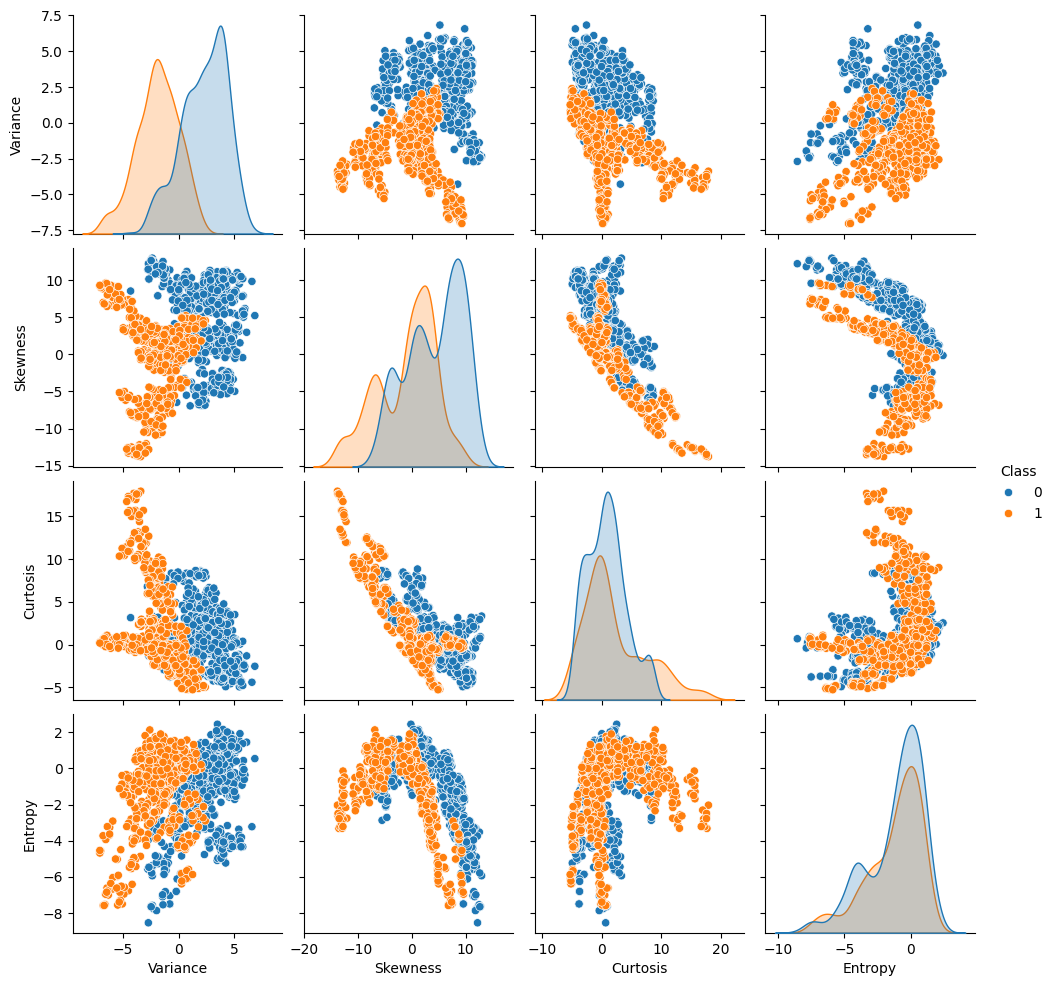

In [5]:
import seaborn as sns

sns.pairplot(df,hue='Class')

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state =0)

In [8]:
from  sklearn.tree import DecisionTreeClassifier

In [9]:
classifier=DecisionTreeClassifier(random_state = 0)
classifier.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

[Text(0.4991319444444444, 0.9444444444444444, 'Variance <= 0.274\ngini = 0.495\nsamples = 1029\nvalue = [567, 462]\nclass = O'),
 Text(0.3298611111111111, 0.8333333333333334, 'Skewness <= 7.565\ngini = 0.298\nsamples = 495\nvalue = [90, 405]\nclass = F'),
 Text(0.22916666666666666, 0.7222222222222222, 'Variance <= -0.471\ngini = 0.129\nsamples = 417\nvalue = [29, 388]\nclass = F'),
 Text(0.1111111111111111, 0.6111111111111112, 'Curtosis <= 6.746\ngini = 0.061\nsamples = 349\nvalue = [11, 338]\nclass = F'),
 Text(0.05555555555555555, 0.5, 'Skewness <= 7.293\ngini = 0.008\nsamples = 249\nvalue = [1, 248]\nclass = F'),
 Text(0.027777777777777776, 0.3888888888888889, 'gini = 0.0\nsamples = 245\nvalue = [0, 245]\nclass = F'),
 Text(0.08333333333333333, 0.3888888888888889, 'Entropy <= -4.115\ngini = 0.375\nsamples = 4\nvalue = [1, 3]\nclass = F'),
 Text(0.05555555555555555, 0.2777777777777778, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]\nclass = F'),
 Text(0.1111111111111111, 0.2777777777777778

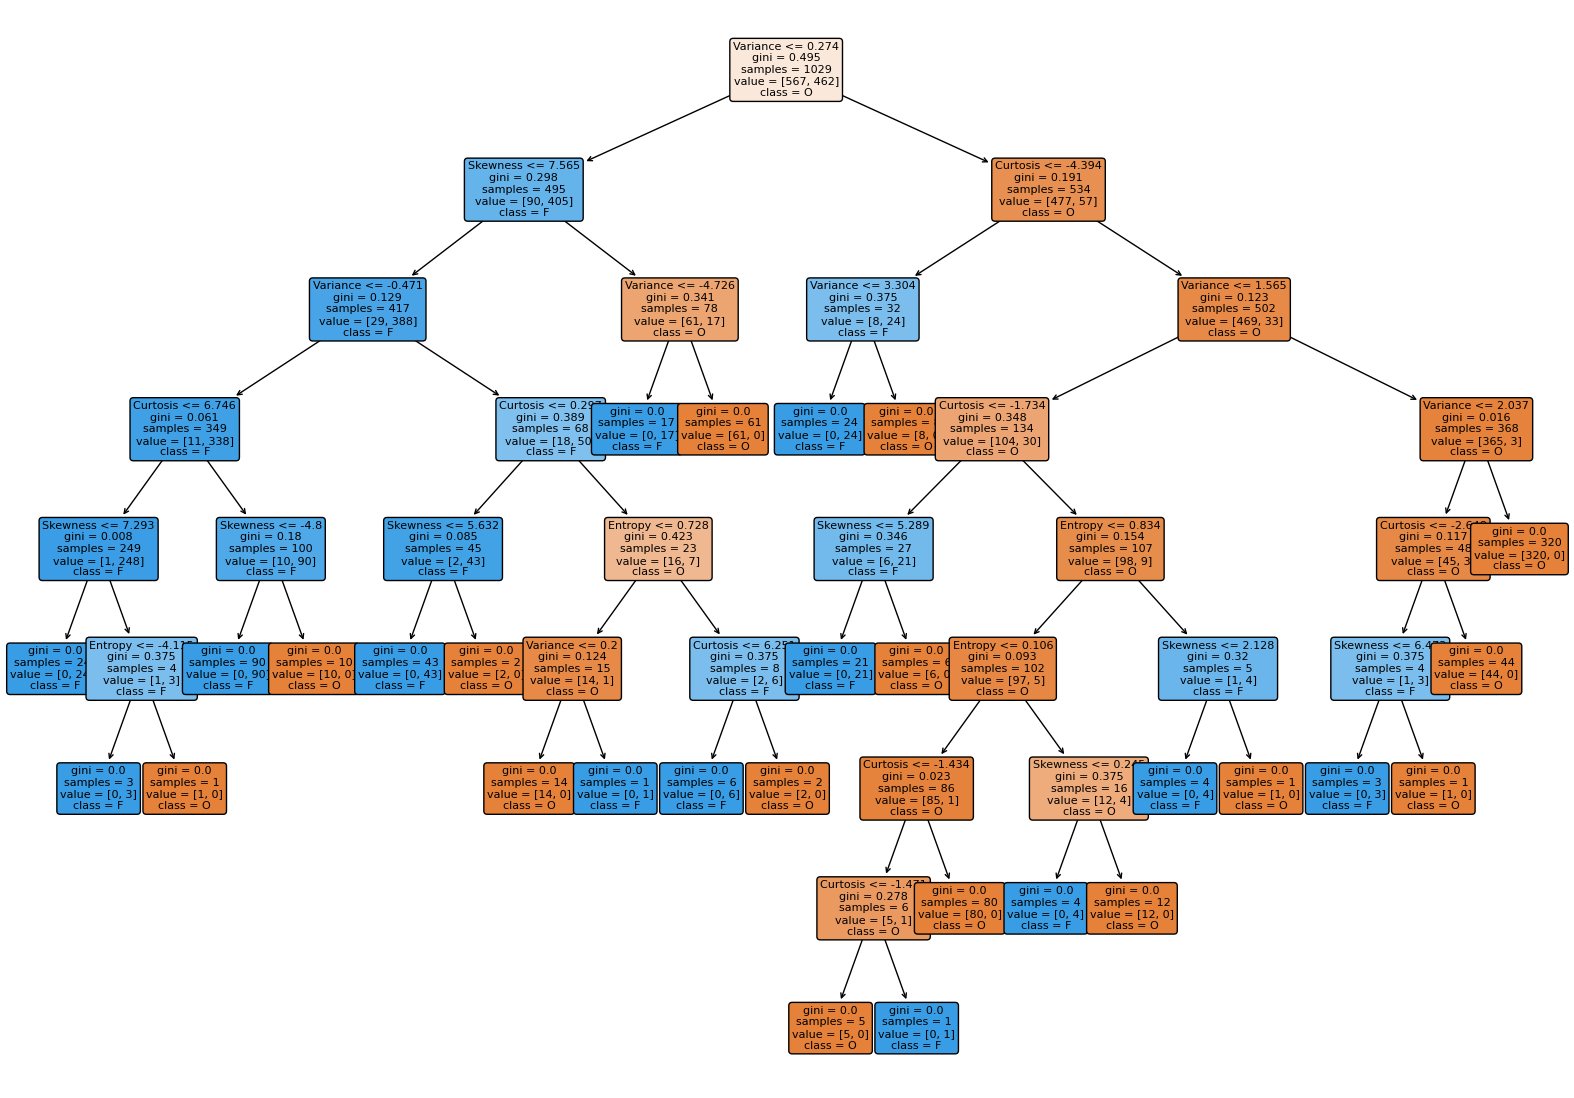

In [13]:
from sklearn.tree import plot_tree
plt.figure(figsize = (20,14))
plot_tree(classifier,fontsize=8,filled=True,feature_names=x.columns,class_names=['O','F'],rounded=True)

In [16]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score,classification_report

In [17]:
y_pred = classifier.predict(x_test)

In [19]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[191,   4],
       [  3, 145]])

In [22]:
accuracy_score(y_test,y_pred)

0.9795918367346939

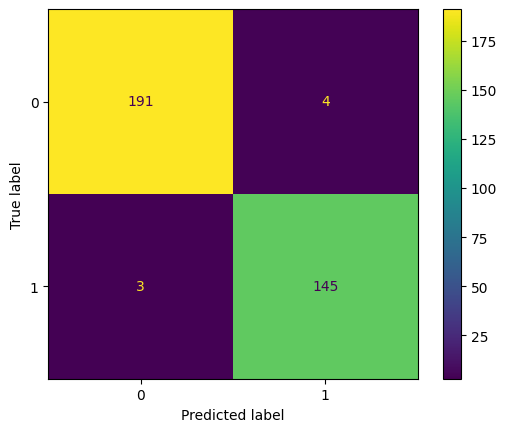

In [26]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [30]:
new = pd.DataFrame({
    'Variance':[3.86600,0.32924,-3.56370],
    'Skewness':[-2.6380,-4.45520,-8.38270],
    'Curtosis':[1.9242,4.5718,12.3930],
    'Entropy':[0.10645,-0.98880,-1.28230]
})

In [31]:
classifier.predict(new)

array([0, 0, 1])